# Mandatory Assignment 3

#### MAT-2201 Numerical Methods

 Daniel Elisabethsønn Antonsen, UiT

Importing libraries and modules needed for the assignment.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
plt.style.use('seaborn-whitegrid')

## Problem 1

*Solve Problem 3 from the MAT-2201 exam from December 2019.*

A quantity $y(t)$ depends on the time variable $t$, is measured in four time points. The measurements are given in the table below.

| $t_i$ for $i = 1,...,4$ | $y_i$ for $i = 1,...,4$ |
|------------------------|-------------------------|
| 0                    | 1                     |
| 1                    | 2                     |
| 2                    | 7                     |
| 3                    | 5                     |

#### (a)

We are here asked to find a polynomial $P(t)$ of degree $\leq 2$ that goes through the **first three** points
$$
(t_1, y_1), (t_2, y_2), (t_3, y_3).
$$

To find the polynomial $P(t)$ we can make use of Lagrange interpolation, which is defined of a degree $\leq 2$ as
$$
P_2 (t) = y_1\frac{(t - t_2) (t - t_3)}{(t_1 - t_2)(t_1 - t_3)} + y_2\frac{(t - t_1) (t - t_3)}{(t_2 - t_1)(t_2 - t_3)} + y_3\frac{(t - t_1) (t - t_2)}{(t_3 - t_1)(t_3 - t_2)}
$$
And so by using the values given in the table we can compute the polynomial as

\begin{align*}
P_2 (t) &= 1 \frac{(t - 1) (t - 2)}{(0 - 1)(0 - 2)} + 2 \frac{(t - 0) (t - 2)}{(1 - 0)(1 - 2)} + 7 \frac{(t - 0) (t - 1)}{(2 - 0)(2 - 1)} \\
&= \frac{1}{2} t^2 - \frac32 t + 1 - 2t^2 + 2t + \frac{7}{2} t^2 - \frac{7}{2} t \\
&= \underline{2t^2 - 3t + 1}
\end{align*}

And so a polynomial $P(t)$ of degree $\leq 2$ is given by
$$
\boxed{P(t) = 2t^2 - 3t + 1}
$$



#### (b)

We are here asked to find a polynomial $S(t)$ of degree $\leq 2$ that fits the **four** points 
$$
(t_1, y_1), (t_2, y_2), (t_3, y_3), (t_4, y_4).
$$
i.e. that **minimizes** the sum given by
$$
\sum_{i=1}^4 (S(t_i) - y_i)^2.
$$

The sum given in the problem, is the squared error or residuals. We can minimize this by using the method of least squares, and if we are given a data set of $m$ data points, can be implemented in three steps.

(1) Choose a model, a parametrized model. This model in our case, will be of the form
$$
S(t) = y = c_1 + c_2 t + c_3 t^2
$$
(2) We then force the model to fit the given data set by substituting in the data points. Each of the data points will then form an equation where all the unknowns are the parameters $c_1$, $c_2$ and $c_3$. This will then form the system of equation given in matrix form as 
$$
A C = b
$$
Where $t$ represents the unknown parameters.  
(3) As the last step, we solve the normal equations which gives us the least squares estimate for the parameters $C$. The solution for the normal equation in found by computing 
$$
A^T A C = A^T b
$$
Or rewriting to 
$$
C = (A^T A)^{-1} A^T b
$$
where $C = \begin{pmatrix} c_1 & c_2 & c_3 \end{pmatrix}^T$. And so, we can start by considering step $1$ and choose a model of the form 
$$
S(t) = y = c_1 + c_2 t + c_3 t^2
$$
Which leads to the system of equations given as

\begin{align*}
y_1 &= c_1 + 0 \cdot c_2 + 0 \cdot c_3 = 1 \\
y_2 &= c_1 + c_2 + c_3 = 2 \\
y_3 &= c_1 + 2 c_2 + 4 c_3 = 7 \\
y_4 &= c_1 + 3 c_2 + 9 c_3 = 5
\end{align*}

Which in matrix form can be written as 
$$
\begin{pmatrix} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \\ 1 & 3 & 9 \end{pmatrix}
\begin{pmatrix} c_1 \\ c_2 \\ c_3 \end{pmatrix} 
= 
\begin{pmatrix} 1 \\ 2 \\ 7 \\ 5 \end{pmatrix}
$$

We can here begin to solve and so solve the equations by finding the matricies $A^T A$ and $A^T $, before solving the normal equation by hand. Or we can simply use python code to solve the equations by implementing the matricies found above. We will here use the second choice for solving and implement python code for solving for the coefficients.

We start by implementing the matricies as arrays

In [64]:
A = np.array([[1, 0, 0], [1, 1, 1], [1, 2, 4], [1, 3, 9]])
b = np.array([[1], [2], [7], [5]])

Now that we have implemented the arrays for the known matricies, we can now solve the normal equations given as
$$
C = (A^T A)^{-1} A^T b
$$
And so

In [65]:
C = np.linalg.inv(A.T@A)@A.T@b
print(f"The solution for the normal equation is {C.T}^T")

The solution for the normal equation is [[ 0.45  3.95 -0.75]]^T


And so, with this result we have that the coefficients are given as 
$$
C 
= 
\begin{pmatrix} c_1 \\ c_2 \\ c_3 \end{pmatrix}
=
\begin{pmatrix} 0.45 \\ 3.95 \\ -0.75 \end{pmatrix}
$$

Using this result, we get that a polynomial given by
$$
S(t) = -0.75 t^2 + 3.95 t + 0.45
$$
which minimizes the the sum 
$$
\sum_{i = 1}^4 (S(t_i) - y_i)^2.
$$


#### (c)

We are given the matrix
$$
B = \begin{bmatrix} 1 & 0 \\ 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}
$$
and is asked to find the **reduced** QR factorization of B, i.e. express B as 
$$
B = QR
$$
where 
$$
Q = \begin{bmatrix} \mathbf{q}_1 & \mathbf{q}_2 \end{bmatrix}
$$
is a $4\times 2$ matrix with orthonormal columns ($\mathbf{q}_i \cdot \mathbf{q}_j = 0$ if $i \neq j$ and $1$ if $i = j$), and $R$ is an upper-triangular $2\times 2$ matrix.

We can start by computing the QR factorization we can start by setting 
$$
y_1 = B_1 = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}
$$
Then we can further compute the $2$-norm or the Euclidean norm, which gives
$$
r_{1 1} = ||y_1||_2 = \sqrt{1^2 + 1^2 + 1^2 + 1^2} = \sqrt{4} = 2
$$
And so, the first unit vector is then found by
$$
q_1 = \frac{y_1}{||y_1||_2} 
= \frac12 \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}
= \begin{bmatrix} 1/2 \\ 1/2 \\ 1/2 \\ 1/2 \end{bmatrix}
$$
Now that we have found the first unit vector or the orthonormal vector, we can continue by finding the second unit vector. This can be found by
$$
y_2 = B_2 - q_1 q_1^T B_2 
= \begin{bmatrix} 0 \\ 1 \\ 2 \\ 3 \end{bmatrix} - \begin{bmatrix} 3/2 \\ 3/2 \\ 3/2 \\ 3/2 \end{bmatrix}
= \begin{bmatrix} -3/2 \\ -1/2 \\ 1/2 \\ 3/2 \end{bmatrix}
$$
We can now compute the $2$-norm for $y_2$ which gives us 
$$
r_{2 2} = ||y_2||_2 = \sqrt{(-3/2)^2 + (-1/2)^2 + (1/2)^2 + (3/2)^2} = \sqrt{5}
$$
And so the second unit vector is given by 
$$
q_2 = \frac{y_2}{||y_2||_2} = \frac{1}{\sqrt{5}} \begin{bmatrix} -3/2 \\ -1/2 \\ 1/2 \\ 3/2 \end{bmatrix}
= \begin{bmatrix} -\frac{3}{2\sqrt{5}} \\ -\frac{1}{2\sqrt{5}} \\ \frac{1}{2\sqrt{5}} \\ \frac{3}{2\sqrt{5}} \end{bmatrix}
$$
We can also find the element which is not on the diagonal by, and since $R$ is upper-triangular we only need to consider 
$$
r_{1 2} = q_1^T B_2
$$
And so $r_{1 2} = 3$, which gives that the $QR$ factorization for the matrix $B$ is given in matrix form as
$$
\boxed{B = \begin{bmatrix} 1 & 0 \\ 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}
= \begin{bmatrix} 1/2 & -\frac{3}{2\sqrt{5}} \\ 1/2 & -\frac{1}{2\sqrt{5}} \\ 1/2 & \frac{1}{2\sqrt{5}} \\ 1/2 & \frac{3}{2\sqrt{5}} \end{bmatrix}
\begin{bmatrix} 2 & 3 \\ 0 & \sqrt{5} \end{bmatrix}
= Q R}
$$



#### (d)

We are here asked to find a polynomial $U(t)$ of degree $\leq 1$ that fits the **four** points 
$$
(t_1, y_1), (t_2, y_2), (t_3, y_3), (t_4, y_4).
$$
i.e. that **minimizes** the sum 
$$
\sum_{i = 1}^4 (U(t_i) - y_i)^2.
$$
We are asked to do this using the QR factorization of the matrix $B$ found in the previous part.

If we are given a $m\times n$ inconsistent system, in matrix form as
$$
Ax = b
$$
then we can solve for the least square solution using the $QR$ factorization by setting

\begin{align*}
\hat{R} = upper\; n\times n\; submatrix\; of\; R \\ 
\hat{d} = upper\; n\; entries\; of\; d = Q^T b
\end{align*}
And so, then we need to solve the equation given as 
$$
\hat{R} \bar{x} = \hat{d} = Q^T b
$$
for $\bar{x}$ which is the least square solution to the system $Ax = b$. 

Further we can use the same three steps as described in (b) but with the slight improvisaton of using the $QR$ factorization which is found in (c) instead of solving the normal equation. We are here asked to find a polynomial which is of degree $\leq 1$, and so our model will be 
$$
U(t) = c_1 + c_2 t
$$
And so, the our system of equations will now take the form

\begin{align*}
y_1 &= c_1 + 0 \cdot c_2 = 1 \\
y_2 &= c_1 + c_2 = 2 \\
y_3 &= c_1 + 2 c_2 = 7 \\
y_4 &= c_1 + 3 c_2 = 5
\end{align*}

Which we can write in matrix form as
$$
\begin{pmatrix} 1 & 0 \\ 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{pmatrix}
\begin{pmatrix} c_1 \\ c_2 \end{pmatrix}
= \begin{pmatrix} 1 \\ 2 \\ 7 \\ 5 \end{pmatrix}
$$
Which we can recognize is has the form $A x = b$, where in this case $B = A$ and $C = x$. And so, using the factorization from (c) we get
$$
\begin{pmatrix} 2 & 3 \\ 0 & \sqrt{5} \end{pmatrix} \begin{pmatrix} c_1 \\ c_2 \end{pmatrix}
= \begin{pmatrix} 1/2 & 1/2 & 1/2 & 1/2 \\ -\frac{3}{2\sqrt{5}} & -\frac{1}{2\sqrt{5}} & \frac{1}{2\sqrt{5}} & \frac{3}{2\sqrt{5}}\end{pmatrix}
\begin{pmatrix} 1 \\ 2 \\ 7 \\ 5 \end{pmatrix}
= \begin{pmatrix} \frac{15}{2} \\ \frac{17}{2\sqrt{5}} \end{pmatrix}
$$

Solving this system for the $c_1$ and $c_2$, we get that the coefficients are given by
$$
\begin{pmatrix} c_1 \\ c_2 \end{pmatrix} = \begin{pmatrix} 6/5 \\ 17/10 \end{pmatrix}
$$

And so the polynomial $U(t)$ that minimizes the sum 
$$
\sum_{i = 1}^{4} (U(t_i) - y_i)^2
$$
is given by 
$$
\boxed{U(t) = \frac{17}{10}t + \frac{6}{5}}
$$


## Problem 2

We are given the Gauss error function which is given as
$$
erf(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} dt
$$

This is a function that can not be written in terms of elementary functions such as polynomials, trigonometric functions and exponential functions etc. Here our goal is to approximate the Gauss error function using elementary functions on the interval $[0,2]$ in three different ways. The motivation for this is if we can find a good approximation, then we don't have to compute (a numerical approximation of) an integral every time we need to compute $erf(x_0)$ for some $x_0 \in [0,2]$.

#### (a)

We are here asked to compute the $5$ first derivatives of the Gauss error function ($erf(x)$) and their values at $x = 0$:
$$
erf(0),\; erf'(0),\; ...,\; erf^{(5)}(0).
$$
We are further asked to write down the $5th$-degree Taylor polynomial of $erf(x)$ around $x = 0$ and denote the polynomial by $T_5 (x)$. We are further asked to comment on what the multiplicity of the root $x = 0$ of $erf(x)$. 

For the computations which need to be performed, then we can make use of the SymPy library in Python. This is made to do symbolic computations in Python, and can handle analytic operations such as differentiation and integration. And the functions can be lambdified and further used for numerical computations. All this make the SymPy library good for our purpose, and so we will here make use of this for computing the derivatives and their values at $x = 0$.

And so, we can start by defining the symbolic expressions for the variables and the Gauss error function. First the variables

In [66]:
x, t = sp.symbols('x t')
print(x, t)

x t


As we can see, we have now defined symbols for the variables that we need so we can now define the Gauss error function using SymPy.

In [67]:
erf = 2 / sp.sqrt(sp.pi) * sp.integrate(sp.exp(-t**2), (t, 0, x))

We could here have used the already defined Gauss error function inside the library, but to illustrate that it is in fact the Gauss error function given in the problem that is used then we have here choosed to write it out.

Further we can evaluate the function for a given value $x$, using the $.subs(x, a)$ and $.evalf()$ where $a$ is the given value of interest. It is also worth noting that we can lambdify a function so ot can be used for numerical computations. And so, we can evaluate the error function for $x = 0$

In [68]:
print(f"erf(0) = {erf.subs(x, 0).evalf()}")

erf(0) = 0


The value for the Gauss error function at $x = 0$ is $0$ and $x = 0$ is a root of the function.

We can now compte the first derivative of the Gauss error function using the $.diff(x)$ method from SymPy.

In [69]:
derf = erf.diff(x)
derf

2*exp(-x**2)/sqrt(pi)

In [70]:
print(f"erf'(0) = {derf.subs(x, 0).evalf()}")

erf'(0) = 1.12837916709551


Using this, we find that the first derivative for $erf(x)$ is
$$
erf'(x) = \frac{2 e^{-x^2}}{\sqrt{\pi}}
$$
Which can be evaluated at $x = 0$ to
$$
erf'(0) = \frac{2}{\sqrt{\pi}} \approx 1.128379
$$

This can be done for the remainder of the derivativatives, and so we can compute the second derivative and evaluate at $x = 0$.

In [71]:
# Computing second derivative of erf
sec_derf = derf.diff(x)
sec_derf

-4*x*exp(-x**2)/sqrt(pi)

In [72]:
# Evaluating second derivative at x = 0
print(f"erf''(0) = {sec_derf.subs(x, 0).evalf()}")

erf''(0) = 0


And so the second derivative of the $erf(x)$ is given as 
$$
erf''(x) = -\frac{4x e^{-x^2}}{\sqrt{\pi}}
$$
Which is evaluated at $x = 0$ as 
$$
erf''(0) = 0
$$

And now for the third derivative of the $erf(x)$.

In [73]:
# Computing third derivative of erf
third_derf = sec_derf.diff(x)
third_derf

8*x**2*exp(-x**2)/sqrt(pi) - 4*exp(-x**2)/sqrt(pi)

In [74]:
# Evaluating third derivative at x = 0
print(f"erf'''(0) = {third_derf.subs(x, 0).evalf()}")

erf'''(0) = -2.25675833419103


And so the third derivative of $erf(x)$ is given as 
$$
erf^{(3)} (x) = \frac{8x^2 e^{- x^{2}}}{\sqrt{\pi}} - \frac{4 e^{- x^{2}}}{\sqrt{\pi}}
$$
which is evaluated at $x = 0$ as
$$
erf^{(3)} (0) = -\frac{4}{\sqrt{\pi}} \approx -2.256758
$$

And now for the fourth derivative of $erf(x)$.

In [75]:
# Computing fourth derivative of erf
fourth_derf = third_derf.diff(x)
fourth_derf

-16*x**3*exp(-x**2)/sqrt(pi) + 24*x*exp(-x**2)/sqrt(pi)

In [76]:
# Evaluating fourth derivative at x = 0
print(f"erf''''(0) = {fourth_derf.subs(x, 0).evalf()}")

erf''''(0) = 0


The fourth derivative of $erf(x)$ is given by
$$
erf^{(4)} (x) = -\frac{16 x^3 e^{- x^{2}}}{\sqrt{\pi}} + \frac{24 x e^{- x^{2}}}{\sqrt{\pi}}
$$
which is evaluated for $x = 0$ as
$$
erf^{(4)} (0) = 0
$$

And finally we compute the fifth derivative of $erf(x)$.

In [77]:
# Computing fifth derivative of erf
fifth_derf = fourth_derf.diff(x)
fifth_derf

32*x**4*exp(-x**2)/sqrt(pi) - 96*x**2*exp(-x**2)/sqrt(pi) + 24*exp(-x**2)/sqrt(pi)

In [78]:
# Evaluating fifth derivative at x = 0
print(f"erf'''''(0) = {fifth_derf.subs(x, 0).evalf()}")

erf'''''(0) = 13.5405500051462


The fifth derivative of the Gauss error function is given by 
$$
erf^{(5)} (x) = \frac{32 x^4 e^{- x^{2}}}{\sqrt{\pi}} - \frac{96 x^2 e^{- x^{2}}}{\sqrt{\pi}} + \frac{24 x^2 e^{- x^{2}}}{\sqrt{\pi}}
$$
which is evaluated for $x = 0$ as 
$$
erf^{(5)} (0) = \frac{24}{\sqrt{\pi}} \approx 13.540550
$$

We can now write down the $5th$-degree Taylor polynomial of the error function. The Taylor polynomial of a degree $5$ is defined as
$$
T_5 (x) = \sum_{n = 0}^5 \frac{erf^{(n)}(a)}{n!}(x - a)^n
$$
Using the derivatives we get that the Taylor polynomial of degree $5$ for the Gauss error function is given by
$$
T_5 (x) = \frac{2}{\sqrt{\pi}} (x - 0)^1 - \frac{4}{6 \sqrt{\pi}} (x - 0)^3 + \frac{24}{120 \sqrt{\pi}} (x - 0)^5
$$
or 
$$
\boxed{T_5 (x) = \frac{2}{\sqrt{\pi}} \left(x - \frac{1}{3} x^3 + \frac{1}{10}x^5 \right) }
$$

The multiplicity of a root $k$ is found by considering the value for the derivatives of the function at the root. If the value for first $m-1$ derivatives of the function is zero and the value for the $m$-th derivative is non-zero, then the multiplicity of the root $k$ is $m$.  
And so since the first derivative of $erf(x)$ is non-zero, then the multiplicity of the root $x = 0$ is *one*.





#### (b)

We are here asked to consider the points $(x_1, y_1), ..., (x_5, y_5)$ which are given by
$$
 x_1 = 0,\; \; x_2 = 1/2,\; \; x_3 = 1,\; \; x_4 = 3/2, \; \; x_5 = 2
$$
and $y_i = e^{-x_i^2}$ for $i = 1, ..., 5$. We are asked to find the $4th$-degree interpolating polynomial $P_4 (x)$ of these points, and compute its anti-derivative. We are also asked to find the polynomial 
$$
P_5 (x) = \int_0^x P_4 (t) dt
$$
We are also asked to elaborate on whether we expect $\frac{2}{\sqrt{\pi}}P_5 (x)$ to be a good approximation to $erf(x)$ or not.

We can either use the Lagrange interpolating polynomial or Newton's divided difference. We will here use Newton's divided difference as our method for finding the interpolating polynomial.

If we have $n$ data points $(x_0, f(x_0)), ...,(x_n, f(x_n))$ and $f[x_1\; ...\; x_n]$ denote the coefficient of the $x^{n-1}$ term in a unique polynomial that interpolates the data points. Then the Newton's divided difference formula for $n$ data points is given by
$$
P(x) = f[x_1] + f[x_1\; x_2](x - x_1) + f[x_1\; x_2\; x_3](x - x_1)(x - x_2) + \dots + f[x_1\; \dots\; x_n](x - x_1) \dots (x - x_{n-1})
$$
where 
$$
f[x_k] = f(x_k)
$$
$$
f[x_{k}\; x_{k+1}] = \frac{f[x_{k+1}] - f[x_{k}]}{x_{k+1} - x_k}
$$
$$
f[x_{k}\; x_{k+1}\; x_{k+2}] = \frac{f[x_{k+1}\; x_{k+2}] - f[x_{k}\; x_{k+1}]}{x_{k+1} - x_k}
$$
And so on, where $k$ starting $x$-value which in our case is $1$.

\begin{align*}
f[x_1] &= y_1 = e^{-x_1^2} = e^{-0^2} = 1 \\
f[x_2] &= y_2 = e^{-x_2^2} = e^{-(1/2)^2} = e^{-1/4} \\
f[x_3] &= y_3 = e^{-x_3^2} = e^{-(1)^2} = e^{-1} \\
f[x_4] &= y_4 = e^{-x_4^2} = e^{-(3/2)^2} = e^{-9/4} \\
f[x_5] &= y_5 = e^{-x_5^2} = e^{-(2)^2} = e^{-4}
\end{align*}

To make it easier to hold controll on the points, we can format the coefficients into a table.

\begin{align*}
\begin{matrix}
x_k & f[x_k] & f[x_k\; x_{k+1}] & f[x_k\; x_{k+1}\; x_{k+2}] & f[x_k\; x_{k+1}\; x_{k+2}\; x_{k+3}] & f[x_k\; x_{k+1}\; x_{k+2}\; x_{k+3}\; x_{k+4}] \\
\_\_\_\_&\_\_\_\_\_\_\_&\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_&\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_&\_\_\_\_\_\_\_\_\_\_\_\_\_&\_\_\_\_\_\_\_\_\_\_\_\_\_ \\
0 & 1 &        \\
  &   &   2e^{-1/4} - 2      \\
1/2 & e^{-1/4} &   &    \frac{-4e + 2e^{1/4}}{e^{5/4}} + 2                      \\
    &   & 2e^{-1} - 2e^{-1/4}      &   & \frac{2(6e^{3} + e - 2e^{13/4} - 5e^{9/4})}{3e^{13/4}}                                         \\
1   & e^{-1}   &    &    \frac{e - 3e^{9/4} + 2e^{3}}{e^{13/4}}  & &  \frac{-8e^{7} - 4e^{5} + 2e^{13/4} + 9e^{25/4} + 2e^{29/4}}{3e^{29/4}}               \\
    &          & e^{-9/4} - e^{-1} &   & \frac{2(-2e^{7} - 3e^{5} + 2e^{13/4} + 4e^{25/4})}{3e^{29/4}}                                              \\
3/2 & e^{-9/4} &     &    \frac{-2e^{5} + 2e^{13/4} + e^{25/4}}{e^{29/4}}               \\
    &          & 2e^{-4} - 2e^{-9/4}                                                     \\
2   & e^{-4}   &
\end{matrix}
\end{align*}

Using this and the formula for Newton's divided difference, we can find a interpolating polynomial. And so

\begin{align*}
P_4 (x) = 1 + (2e^{-1/4} - 2)(x - 0) &+ \left(\frac{-4e + 2e^{1/4}}{e^{5/4}} + 2\right)(x - 0)(x - 1/2) \\
&+ \left(\frac{2(6e^{3} + e - 2e^{13/4} - 5e^{9/4})}{3e^{13/4}}\right)(x - 0)(x - 1/2)(x - 1) \\
&+ \left(\frac{-8e^{7} - 4e^{5} + 2e^{13/4} + 9e^{25/4} + 2e^{29/4}}{3e^{29/4}}\right)(x - 0)(x - 1/2)(x - 1)(x - 3/2)
\end{align*}
By cleaning up and adding corresponding therms we get 

\begin{align*}
P_4 (x) &= 1 - 0.44239 x - 0.37944 x^2 + 0.18995 x + 0.62587x^3 \\
&+ 0.93881x^2 + 0.312935 x - 0.43481 x^3 + 1.30443 x^3 - 1.1957 x^2 + 0.32611 x \\

P_4 (x) &= \boxed{1.49549x^3 - 0.63633x^2 + 0.386605x + 1}
\end{align*}
And so we have found a interpolating polynomial for the points given

The anti-derivative of the polynomial $P_4 (x)$ is the integral with respect to $x$, so we can compute the indetermined integral
$$
\int (1.49549x^3 - 0.63633x^2 + 0.386605x + 1)dx = \boxed{0.3738725 x^4 - 0.212109 x^3 + 0.1933025 x^2 + x + C}
$$
where $C$ is the integration constant.

We can now use this result to find the polynomial $P_5 (x)$ which is defined as
$$
P_5 (x) = \int_0^x P_4(t) dt
$$
And so

\begin{align*}
P_5 (x) &= \int_0^x P_4(t) dt \\
&= \int_0^x (1.49549t^3 - 0.63633t^2 + 0.386605t + 1)dt \\
&= \boxed{0.3738725 x^4 - 0.212109 x^3 + 0.1933025 x^2 + x} 
\end{align*}

We know that the Gauss error function is defined as
$$
erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2}dt
$$
And we have that the interpolating polynomial is defined for the function $e^{-t^2}$, so for us to be able to compere $P_5 (x)$ with the error function then we need to multiply the polynomial with the factor $\frac{2}{\sqrt{\pi}}$. And so
$$
\frac{2}{\sqrt{\pi}}P_5 (x) = \frac{2}{\sqrt{\pi}} (0.3738725 x^4 - 0.212109 x^3 + 0.1933025 x^2 + x)
$$

We expect $P_5 (x)$ to be a reasonably good approximation, but since we have approximated the coefficients of the polynomial we will have a good amount of error in our computations. 


#### (c)

We are here asked to consider the function 
$$
f(x) = 1 - \left(\frac{c_1}{1 + 0.47047x} + \frac{c_2}{(1 + 0.47047x)^2} + \frac{c_3}{(1 + 0.47047x)^3}\right)e^{-x^2}
$$
which depends on the $3$ parameters $c_1$, $c_2$ and $c_3$. And we let $x_1, ..., x_4$ be $4$ ordered and equally spaced points on the interval $[0,2]$, with $x_1 = 0$ and $x_4 = 2$ and we also let $y_i = erf(x_i)$ for $i=1,2,3,4$. We can use the given approximated values
$$
y_1 = 0.0,\; \; y_2 = 0.65422141,\; \; y_3 = 0.94065356,\; \; y_4 = 0.99532227.
$$
which are all found by nummerical integration. We are asked to explain that the conditions $y_1 = f(x_1), ..., y_4 = f(x_4)$ can be interpreted as a linear system of equations on the variables $c_1$, $c_2$ and $c_3$, and weather or not this system is consistent. That is, does it have a solution. We are further asked to find the least squares solution of the system and explain in which sense it determines the best approximation to $erf(x)$.  
We are then asked to choose the values for $c_1$, $c_2$ and $c_3$ found above and plot together with $P_5 (x)$ and $T_5 (x)$. 

We are asked to use four data points, that is $x_i$ for $i = 1,2,3,4$ which are eually spaced. We can use the linspace() function from numpy library to find all the $x$-values.

In [79]:
print(f"The x-values are given in the array {np.linspace(0, 2, 4)}")

The x-values are given in the array [0.         0.66666667 1.33333333 2.        ]


And so we have the $x$-values

\begin{align*}
x_1 &= 0 \\
x_2 &= 0.66\bar{6} \\
x_3 &= 1.33\bar{3} \\
x_4 &= 2
\end{align*}

We are given the conditions 

\begin{align*}
y_1 &= f(x_1) \\
y_2 &= f(x_2) \\
y_3 &= f(x_3) \\
y_4 &= f(x_4)
\end{align*}

If we now use the expression for the function and the values for $x_i$ and $y_i$, we get the following set of equations

\begin{align*}
y_1 &= 1 - \left(\frac{c_1}{1 + 0.47047x_1} + \frac{c_2}{(1 + 0.47047x_1)^2} + \frac{c_3}{(1 + 0.47047x_1)^3}\right)e^{-x_1^2} = 0.0 \\
y_2 &= 1 - \left(\frac{c_1}{1 + 0.47047x_2} + \frac{c_2}{(1 + 0.47047x_2)^2} + \frac{c_3}{(1 + 0.47047x_2)^3}\right)e^{-x_2^2} = 0.65422141 \\
y_3 &= 1 - \left(\frac{c_1}{1 + 0.47047x_3} + \frac{c_2}{(1 + 0.47047x_3)^2} + \frac{c_3}{(1 + 0.47047x_3)^3}\right)e^{-x_3^2} = 0.94065356 \\
y_4 &= 1 - \left(\frac{c_1}{1 + 0.47047x_4} + \frac{c_2}{(1 + 0.47047x_4)^2} + \frac{c_3}{(1 + 0.47047x_4)^3}\right)e^{-x_4^2} = 0.99532227 \\
\end{align*}
we can further input the value for $x_i$ and write the system with respect to $c_i$ for $i = 1,2,3$. And so

\begin{align*}
c_1 + c_2 + c_3 &= 1 \\
0.48809c_1 + 0.37155c_2 + 0.28284c_3 &= 0.34577859 \\
0.10386c_1 + 0.06382c_2 + 0.03922c_3 &= 0.05934644 \\
0.00943c_1 + 0.00486c_2 + 0.00250c_3 &= 0.00467773
\end{align*}

Which we can see is a linear system of equations on the variables $c_i$ for $i = 1,2,3$. We can also write the system i matrix from as
$$
\begin{pmatrix} 1 & 1 & 1 \\ 0.48809 & 0.37155 & 0.28284 \\ 0.10386 & 0.06382 & 0.03922 \\ 0.00943 & 0.00486 & 0.00250 \end{pmatrix}
\begin{pmatrix} c_1 \\ c_2 \\ c_3 \end{pmatrix}
= 
\begin{pmatrix} 1 \\ 0.34577859 \\ 0.05934644 \\ 0.00467773 \end{pmatrix}
$$
or 
$$
AC = b
$$

For a linear system of equations where there are no solution, is what we call inconsistent. This is usually the case when there are $m$ equations with $n$ unknowns where $m > n$, and so using this fact we can notice that we have $3$ unkowns and $4$ equations. That is, our system is in fact **inconsistent** and by that has **no solution**.

We can now use the least squares method to solve the system, and so we use the same method as used in problem 1b). And so, we can start by defining the matricies as arrays in python. 

In [80]:
# Defining the matricies
A2 = np.array([[1, 1, 1], [0.48809, 0.37155, 0.28284], [0.10386, 0.06382, 0.03922], [0.00943, 0.00486, 0.00250]])
b2 = np.array([[1], [0.34577859], [0.05934644], [0.00467773]])

Further we can solve for the matrix $C$ by considering the normal equation, which is defined as 
$$
A^T A \bar{C} = A^T b
$$
or 
$$
\bar{C} = (A^T A)^{-1} A^T b
$$
This is something we can solve using python, and so

In [81]:
C2 = np.linalg.inv(A2.T@A2)@A2.T@b2
print(f"The solution for the normal equation is {C2.T}^T")

The solution for the normal equation is [[ 0.3460064  -0.09107299  0.74506658]]^T


And so, we have that the least squares solution for our linear system of equations are given as
$$
\begin{pmatrix} c_1 \\ c_2 \\ c_3 \end{pmatrix}
= \begin{pmatrix} 0.3460064 \\ -0.09107299 \\ 0.74506658 \end{pmatrix}
$$

And so, $f(x)$ takes the form 
$$
f(x) = 1 - \left(\frac{0.3460064}{1 + 0.47047x} - \frac{0.09107299}{(1 + 0.47047x)^2} + \frac{0.74506658}{(1 + 0.47047x)^3}\right)e^{-x^2}
$$

For plotting $T_5 (x)$, $P_5 (x)$ and $f(x)$, we can start by implementing the functions as functions in python.

In [82]:
# Implementing the functions 
P_5 = lambda x: (2 / np.sqrt(np.pi)) * (0.3738725 * x**4 - 0.212109 * x**3 + 0.1933025 * x**2 + x)
T_5 = lambda x: (2 / np.sqrt(np.pi)) * (x - (1 / 3) * x**3 + (1 / 10) * x**5)
f_x = lambda x: 1 - ( C2[0] / (1 + 0.47047 * x) + C2[1] / (1 + 0.47047 * x)**2 + C2[2] / (1 + 0.47047 * x)**3 ) * np.exp(-x**2)

And we can now further plot all the functions found together.

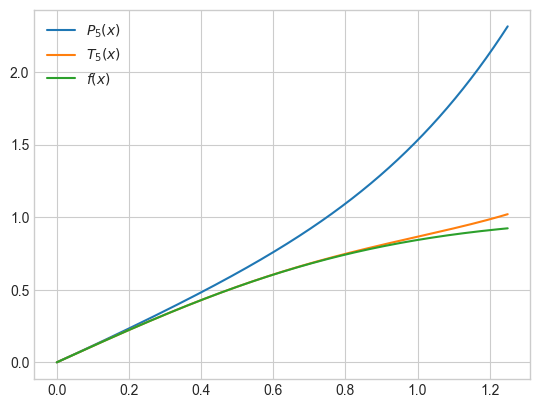

In [83]:
# Defining the x-values
x_values = np.linspace(0, 1.25, 1000)
# Plot the functions
plt.plot(x_values, P_5(x_values), label = r'$P_5(x)$')
plt.plot(x_values, T_5(x_values), label = r'$T_5(x)$')
plt.plot(x_values, f_x(x_values), label = r'$f(x)$')
plt.legend()
plt.show()

By considering the webpage given in the footnotes, we can see that under the subsection *numerical approximations* there is given a approximated function which is like the one we have but with slightly different values for $c_i$ for $i = 1,2,3$. This can come from the approximations for the intermeadiate values done in computing our values for $c_i$. 

#### (d)

We are now asked to test the $3$ approximations which is found in the previous exercises in the problem. To be able to do this, we need to know a sufficiently precise approximation for $erf(x_0)$ for some $x_0 \in [0,2]$. 

We are here asked to split the interval $[0,2]$ up into $2000$ subintervals and we are further asked to find an approximation of $erf(2)$ by applying the **composite trapozezoid rule** for the corresponding grid points. We are not allowed to do this by hand, and so we will make use of a program to do the computations.

The composite trapozezoid rule is simply the sum of the trapozezoid rule applied to adjecent subintervals. And so, to approximate an integral of the form 
$$
\int_a^b f(x)dx
$$
We consider an evanly separated grid 
$$
a = x_0 < x_1 < x_2 < \cdots < x_{m-2} < x_{m-1} < x_{m} = b
$$
Then the **composite trapozezoid rule** is given by 
$$
\int_a^b f(x) dx = \frac{h}{2} \left(y_0 + y_m + 2\sum_{i = 1}^{m - 1} y_i \right)
$$
where 
$$
h = \frac{(b - a)}{m}
$$
In our case, we have that the composite trapozezoid rule is given by
$$
\int_a^b e^{-x^2} dx = \frac{h}{2} \left(e^{-a^2} + e^{-b^2} + 2\sum_{i = 1}^{m - 1} e^{-t_i^2} \right)
$$

And so, to compute the value we can implement a function in python.

In [84]:
def Comp_trapz(f, a:float, b:float, n:int):
    """
    Function for computing the composite trapezoidal rule

    Input:
        f: function to be integrated
        a: lower limit of integration
        b: upper limit of integration
        n: number of subintervals
    Output:
        The value of the integral
    """
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return h * 0.5 * (y[0] + y[-1] + 2 * np.sum(y))

Now that we have made a function for approximating the integral 
$$
\int_0^2 e^{-t}dt
$$
We can use this to compute an approximation for $erf(2)$.

In [85]:
# Defining the function to be integrated
f = lambda x: np.exp(-x**2)
erf_2 = (2 / np.sqrt(np.pi)) * Comp_trapz(f, 0, 2, 2000)
print(f"The value of erf(2) is {erf_2}")

The value of erf(2) is 0.9964713042824083


We have found an approximation is given using the composite trapozezoid rule, as
$$
\boxed{erf(2) \approx 0.9964713042824083}
$$



